In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

In [2]:
ccolors = plt.get_cmap('tab10')

# dispersal rates

In [5]:
def true_inf_disp_plot(true_string, inferred_string, SIGMAdisps=[0.25,0.5,0.75], SIGMAmate=0.5, tCutoff=None, nreps=range(10), xmax=None, filename=None):

    expected = [(SIGMAdisp**2 + SIGMAmate**2/2)**0.5 for SIGMAdisp in SIGMAdisps] #see Smith et al, https://academic.oup.com/genetics/article/224/2/iyad068/7117621
    
    fig, axs = plt.subplots(1, 1, figsize=(5,5))

    mless = []
    for SIGMAdisp in SIGMAdisps:
        mles = []
        for nrep in nreps:
            mle = np.load(true_string %(SIGMAdisp, nrep, tCutoff))
            mles.append(mle)
        mless.append(mles)
    true_mless = np.array(mless)

    mless = []
    for SIGMAdisp in SIGMAdisps:
        mles = []
        for nrep in nreps:
            try:
                mle = np.loadtxt(inferred_string %(SIGMAdisp, nrep, tCutoff), delimiter=',')
            except:
                mle = np.load(inferred_string %(SIGMAdisp, nrep, tCutoff))
            mles.append(mle)
        mless.append(mles)
    inf_mless = np.array(mless)

    axs.plot([0,xmax], [0,xmax], c='k', zorder=0)
    for i,ex in enumerate(expected):
        axs.scatter(true_mless[i,:,0], inf_mless[i,:,0], alpha=0.75, color=ccolors(i), marker=r'$x$')
        axs.scatter(true_mless[i,:,1], inf_mless[i,:,1], alpha=0.75, color=ccolors(i), marker=r'$y$')
        axs.plot([0,ex],[ex,ex], color=ccolors(i), alpha=0.75)
        axs.plot([ex,ex],[0,ex], color=ccolors(i), alpha=0.75)
        
    axs.set_xlabel(r'$\widehat{\sigma}$, true trees', fontsize=14)
    axs.set_ylabel(r'$\widehat{\sigma}$, inferred trees', fontsize=14)
    axs.set_ylim(0,xmax)
    axs.set_xlim(0,xmax)
    
    if filename is not None:
        plt.savefig(filename)
        
    plt.show()

## different time cutoffs

T=None


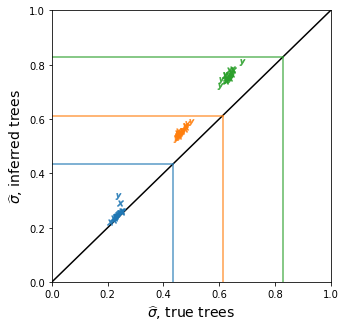

T=1000


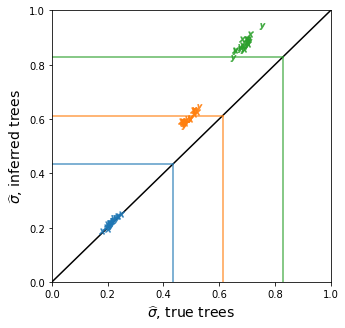

T=100


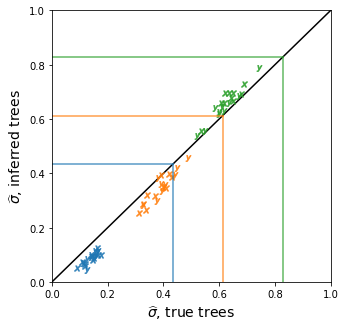

In [6]:
true_string = 'data/sim_100000000L_1e-08RBP_2.0LAMBDA_1.0K_100W_1.0SIGMAcomp_0.5SIGMAmate_%sSIGMAdisp_0selfing_40000MAXT_%dnrep_10000Ne_1e-08U_100d_50k_2G_100treeskip_%stCutoff_mle-dispersal.npy'
inferred_string = 'data/sim_100000000L_1e-08RBP_2.0LAMBDA_1.0K_100W_1.0SIGMAcomp_0.5SIGMAmate_%sSIGMAdisp_0selfing_40000MAXT_%dnrep_10000Ne_1e-08U_100d_50k_2G_5numiter_0.5threshold_100treeskip_1000M_%stCutoff_1000m_mle-dispersal.npy'

for tCutoff in ['None',1000,100]:

    filename = 'plots/disp-T%s.pdf' %tCutoff
    filename = None
    print('T=%s' %tCutoff)
    true_inf_disp_plot(true_string, inferred_string, tCutoff=tCutoff, xmax=1, filename=filename)

## different numbers of samples

T=None


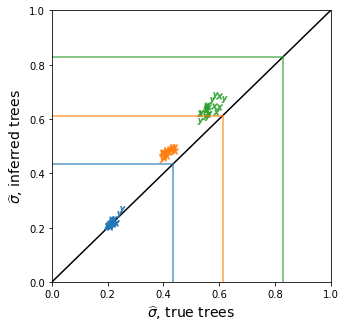

T=1000


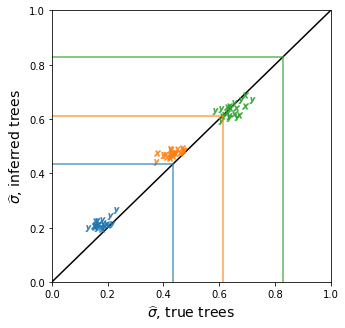

T=100


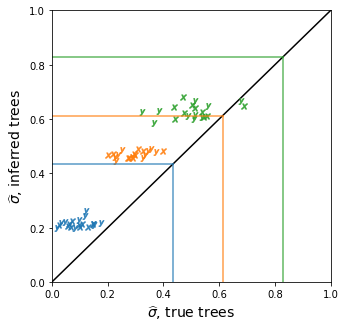

In [7]:
k = 25

true_string = 'data/sim_100000000L_1e-08RBP_2.0LAMBDA_1.0K_100W_1.0SIGMAcomp_0.5SIGMAmate_%sSIGMAdisp_0selfing_40000MAXT_%dnrep_10000Ne_1e-08U_100d_25k_2G_100treeskip_%stCutoff_mle-dispersal.npy'
inferred_string = 'data/sim_100000000L_1e-08RBP_2.0LAMBDA_1.0K_100W_1.0SIGMAcomp_0.5SIGMAmate_%sSIGMAdisp_0selfing_40000MAXT_%dnrep_10000Ne_1e-08U_100d_25k_2G_5numiter_0.5threshold_100treeskip_1000M_100m_100n_%sT.sigma'

for tCutoff in ['None',1000,100]:

    filename = 'plots/disp-T%s-%dk.pdf' %(tCutoff,k)
    filename = None
    print('T=%s' %tCutoff)
    true_inf_disp_plot(true_string, inferred_string, tCutoff=tCutoff, xmax=1, filename=filename)

T=None


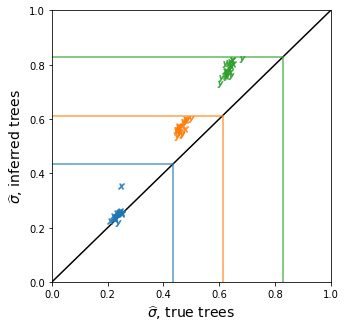

T=1000


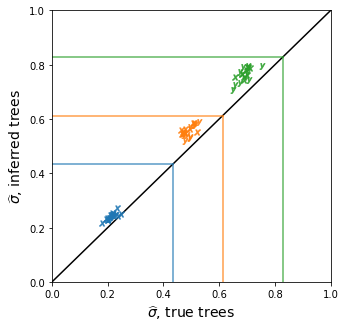

T=100


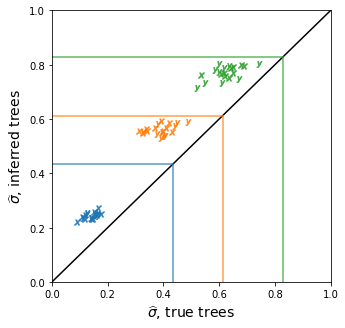

In [8]:
k = 50

true_string = 'data/sim_100000000L_1e-08RBP_2.0LAMBDA_1.0K_100W_1.0SIGMAcomp_0.5SIGMAmate_%sSIGMAdisp_0selfing_40000MAXT_%dnrep_10000Ne_1e-08U_100d_50k_2G_100treeskip_%stCutoff_mle-dispersal.npy'
inferred_string = 'data/sim_100000000L_1e-08RBP_2.0LAMBDA_1.0K_100W_1.0SIGMAcomp_0.5SIGMAmate_%sSIGMAdisp_0selfing_40000MAXT_%dnrep_10000Ne_1e-08U_100d_50k_2G_5numiter_0.5threshold_100treeskip_1000M_100m_100n_%sT.sigma'

for tCutoff in ['None',1000,100]:

    filename = 'plots/disp-T%s-%dk.pdf' %(tCutoff,k)
#     filename = None
    print('T=%s' %tCutoff)
    true_inf_disp_plot(true_string, inferred_string, tCutoff=tCutoff, xmax=1, filename=filename)

T=None


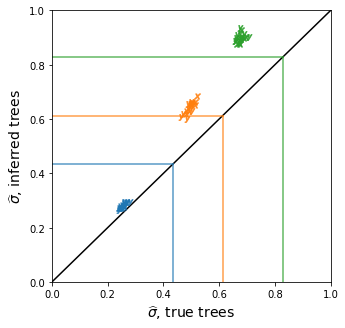

T=1000


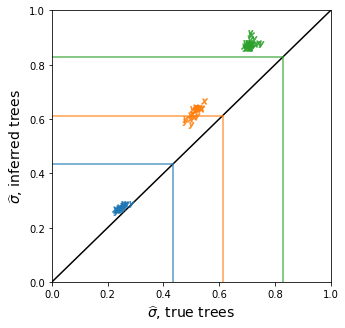

T=100


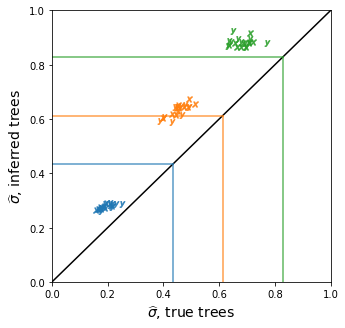

In [9]:
k = 100

true_string = 'data/sim_100000000L_1e-08RBP_2.0LAMBDA_1.0K_100W_1.0SIGMAcomp_0.5SIGMAmate_%sSIGMAdisp_0selfing_40000MAXT_%dnrep_10000Ne_1e-08U_100d_100k_2G_100treeskip_%stCutoff_mle-dispersal.npy'
inferred_string = 'data/sim_100000000L_1e-08RBP_2.0LAMBDA_1.0K_100W_1.0SIGMAcomp_0.5SIGMAmate_%sSIGMAdisp_0selfing_40000MAXT_%dnrep_10000Ne_1e-08U_100d_100k_2G_5numiter_0.5threshold_100treeskip_1000M_100m_100n_%sT.sigma'

for tCutoff in ['None',1000,100]:

    filename = 'plots/disp-T%s-%dk.pdf' %(tCutoff,k)
#     filename = None
    print('T=%s' %tCutoff)
    true_inf_disp_plot(true_string, inferred_string, tCutoff=tCutoff, xmax=1, filename=filename)

## different numbers of importance samples

T=None


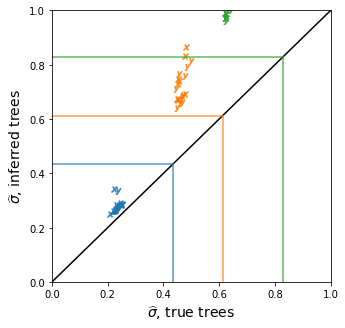

T=1000


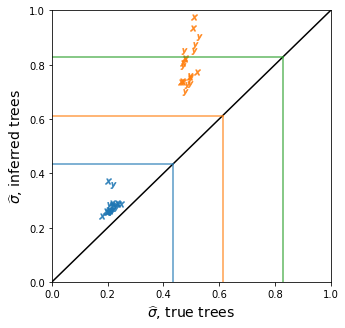

T=100


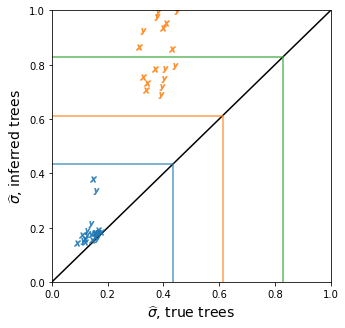

In [10]:
m = 1

true_string = 'data/sim_100000000L_1e-08RBP_2.0LAMBDA_1.0K_100W_1.0SIGMAcomp_0.5SIGMAmate_%sSIGMAdisp_0selfing_40000MAXT_%dnrep_10000Ne_1e-08U_100d_50k_2G_100treeskip_%stCutoff_mle-dispersal.npy'
inferred_string = 'data/sim_100000000L_1e-08RBP_2.0LAMBDA_1.0K_100W_1.0SIGMAcomp_0.5SIGMAmate_%sSIGMAdisp_0selfing_40000MAXT_%dnrep_10000Ne_1e-08U_100d_50k_2G_5numiter_0.5threshold_100treeskip_1000M_%stCutoff_1m_mle-dispersal.npy'

for tCutoff in ['None',1000,100]:

    filename = 'plots/disp-T%s-%dm.pdf' %(tCutoff,m)
#     filename = None
    print('T=%s' %tCutoff)
    true_inf_disp_plot(true_string, inferred_string, tCutoff=tCutoff, xmax=1, filename=filename)

T=None


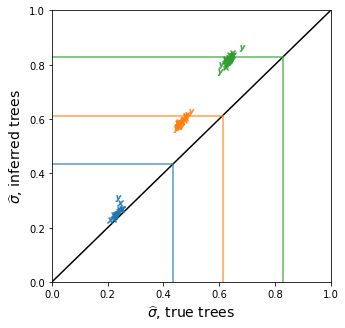

T=1000


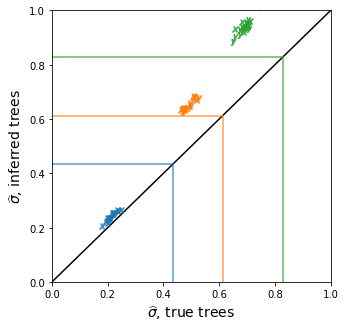

T=100


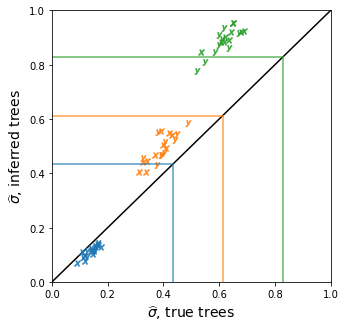

In [11]:
m = 10

true_string = 'data/sim_100000000L_1e-08RBP_2.0LAMBDA_1.0K_100W_1.0SIGMAcomp_0.5SIGMAmate_%sSIGMAdisp_0selfing_40000MAXT_%dnrep_10000Ne_1e-08U_100d_50k_2G_100treeskip_%stCutoff_mle-dispersal.npy'
inferred_string = 'data/sim_100000000L_1e-08RBP_2.0LAMBDA_1.0K_100W_1.0SIGMAcomp_0.5SIGMAmate_%sSIGMAdisp_0selfing_40000MAXT_%dnrep_10000Ne_1e-08U_100d_50k_2G_5numiter_0.5threshold_100treeskip_1000M_%stCutoff_10m_mle-dispersal.npy'

for tCutoff in ['None',1000,100]:

    filename = 'plots/disp-T%s-%dm.pdf' %(tCutoff,m)
#     filename = None
    print('T=%s' %tCutoff)
    true_inf_disp_plot(true_string, inferred_string, tCutoff=tCutoff, xmax=1, filename=filename)

T=None


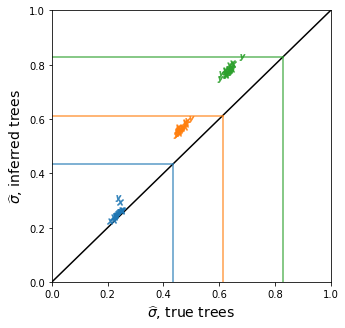

T=1000


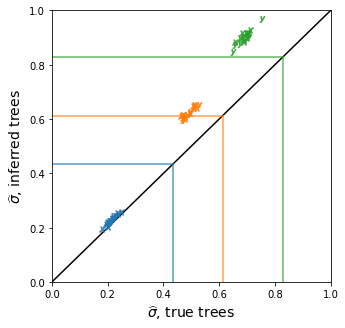

T=100


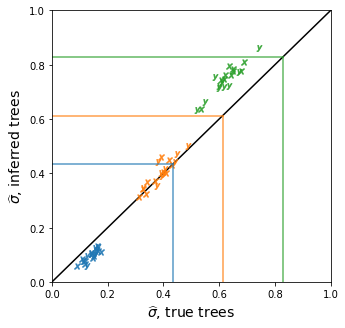

In [12]:
m = 100

true_string = 'data/sim_100000000L_1e-08RBP_2.0LAMBDA_1.0K_100W_1.0SIGMAcomp_0.5SIGMAmate_%sSIGMAdisp_0selfing_40000MAXT_%dnrep_10000Ne_1e-08U_100d_50k_2G_100treeskip_%stCutoff_mle-dispersal.npy'
inferred_string = 'data/sim_100000000L_1e-08RBP_2.0LAMBDA_1.0K_100W_1.0SIGMAcomp_0.5SIGMAmate_%sSIGMAdisp_0selfing_40000MAXT_%dnrep_10000Ne_1e-08U_100d_50k_2G_5numiter_0.5threshold_100treeskip_1000M_%stCutoff_100m_mle-dispersal.npy'

for tCutoff in ['None',1000,100]:

    filename = 'plots/disp-T%s-%dm.pdf' %(tCutoff,m)
#     filename = None
    print('T=%s' %tCutoff)
    true_inf_disp_plot(true_string, inferred_string, tCutoff=tCutoff, xmax=1, filename=filename)

# ancestor locations

## single lineages

In [13]:
def _plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    def _eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = _eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = patches.Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

In [14]:
SIGMAmate = 0.5
SIGMAdisp = 0.75

sigma2 = SIGMAdisp**2 + SIGMAmate**2/2
sigma = np.array([[sigma2,0],[0,sigma2]])

retain_gens = range(0,1001,100)

prefix = 'data/sim_100000000L_1e-08RBP_2.0LAMBDA_1.0K_100W_1.0SIGMAcomp_%sSIGMAmate_%sSIGMAdisp_0selfing_40000MAXT_0nrep_10000Ne_1e-08U_100d_50k_2G_100treeskip' %(SIGMAmate, SIGMAdisp)
filename = prefix + '_anc-locs.npy'
real_anc_locs = np.load(filename)
filename = prefix + '_NonetCutoff_ancestor-locations.npy'
true_anc_locs = np.load(filename)
filename = prefix + '_NonetCutoff_ancestor-variances.npy'
true_anc_vars = np.load(filename)

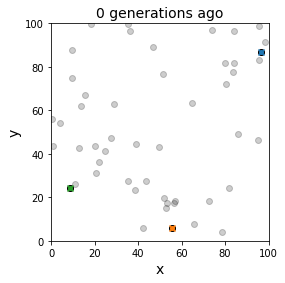

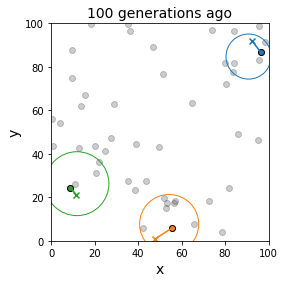

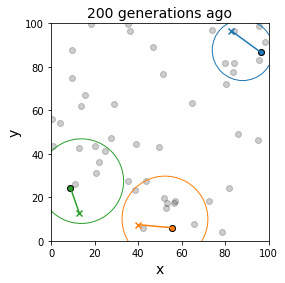

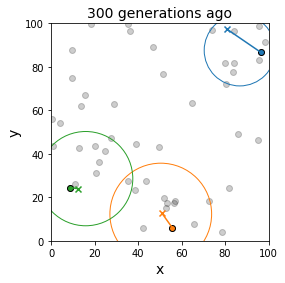

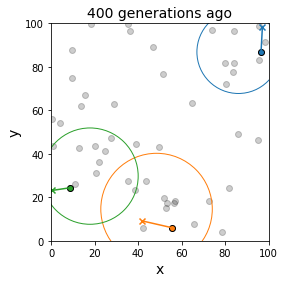

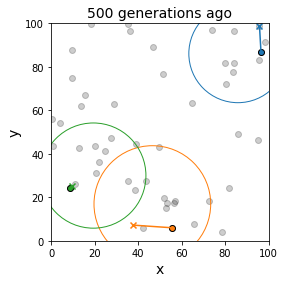

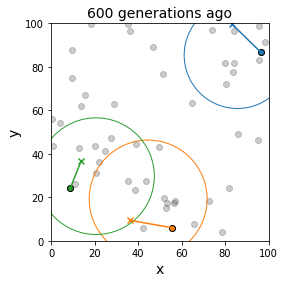

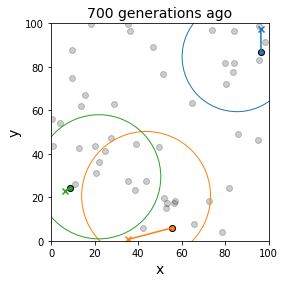

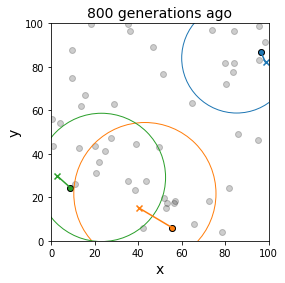

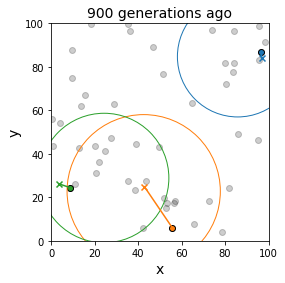

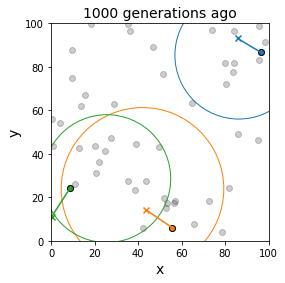

In [15]:
locus=0
samples=[0,2,4]
sample_colors = [ccolors(i) for i in range(len(samples))]

for i,t in enumerate(retain_gens):

    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    
    ax.scatter(real_anc_locs[0,:,0,0], real_anc_locs[0,:,0,1], color='k', alpha=0.1) #all samples
    
    for sample, sample_color in zip(samples, sample_colors):
        
        ax.scatter(real_anc_locs[locus,sample,0,0], real_anc_locs[locus,sample,0,1], color=sample_color, label=sample, edgecolors='k') #sample location
        ax.scatter(real_anc_locs[locus,sample,i,0], real_anc_locs[locus,sample,i,1], color=sample_color, marker='x') #ancestor location
        ax.plot([real_anc_locs[locus,sample,0,0],real_anc_locs[locus,sample,i,0]], [real_anc_locs[locus,sample,0,1],real_anc_locs[locus,sample,i,1]], color=sample_color) #connnect
        _plot_cov_ellipse(sigma*true_anc_vars[locus,sample,i,0], [true_anc_locs[locus,sample,i,0], true_anc_locs[locus,sample,i,1]], 
                          nstd=1.96, fill=False, color=sample_color) #95% CI
        
    ax.set_xlim(0,100)
    ax.set_ylim(0,100)
    ax.set_title('%d generations ago' %t, fontsize=14)
#     ax.legend()
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)

    plt.savefig('plots/single-lineages-%dt.pdf' %t)
    
    plt.show()

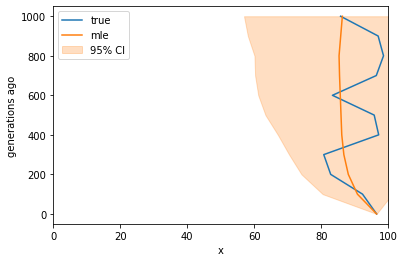

In [16]:
axis=0
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(real_anc_locs[0,0,:,axis], retain_gens, label='true')
ax.plot(true_anc_locs[0,0,:,axis], retain_gens, label='mle')
ax.fill_betweenx(retain_gens, 
                 true_anc_locs[0,0,:,axis] - 1.96*(sigma2*true_anc_vars[0,0,:,0])**0.5, true_anc_locs[0,0,:,axis] + 1.96*(sigma2*true_anc_vars[0,0,:,0])**0.5, 
                 color=ccolors(1), alpha=0.25 ,label='95% CI')
# ax.scatter(true_anc_locs[0,0,i,0], true_anc_locs[0,0,i,1], label='inferred')
# ax.scatter(real_anc_locs[0,0,i,0], real_anc_locs[0,0,i,1], label='true')
# _plot_cov_ellipse(sigma*true_anc_vars[0,0,i,0], [true_anc_locs[0,0,i,0], true_anc_locs[0,0,i,1]], nstd=1.96, fill=False, color=ccolors(0))
ax.set_xlim(0,100)
# ax.set_ylim(0,100)
# ax.set_title('%d generations ago' %t)
ax.legend()
if axis==0:
    ax.set_xlabel('x')
else:
    ax.set_xlabel('y')
ax.set_ylabel('generations ago')
plt.show()

In [6]:
def lineage_error(SIGMAmate=0.5, SIGMAdisp=0.75, nreps=range(10), k=50, plotfilename=None, nsamples=10, nloci=None, ending='_NonetCutoff_ancestor-locations_%dsample.npy'):

    prefix = 'data/sim_100000000L_1e-08RBP_2.0LAMBDA_1.0K_100W_1.0SIGMAcomp_%sSIGMAmate_%sSIGMAdisp_0selfing_40000MAXT' %(SIGMAmate,SIGMAdisp)

    sse_mle = np.zeros(11)
    sse_sample = np.zeros(11)
    sse_mean_sample = np.zeros(11)
    sse_mle_inf = np.zeros(11)
    n = 0
    n_inf = 0
    nreps = range(10)
    for rep in nreps:

        prefix_rep = prefix + '_%dnrep_10000Ne_1e-08U_100d_%dk_2G' %(rep,k)

        # real ancestor locations at loci used for true trees
        filename = prefix_rep + '_100treeskip_anc-locs.npy'
        real_anc_locs = np.load(filename)[:nloci,:nsamples]

        # mle ancestor locations from true trees
        filename = prefix_rep + '_100treeskip_NonetCutoff_ancestor-locations.npy'
        true_anc_locs = np.load(filename)[:nloci,:nsamples]

        # sum squared error between mle and real ancestor locations
        sse_mle += np.sum(np.sum((real_anc_locs - true_anc_locs)**2, axis=-1), axis=(0,1))

        # sum squared error between sample locations and real ancestor locations
        sample_locs = np.repeat(real_anc_locs[:,:,0,:], 11, axis=-2).reshape(real_anc_locs.shape) #locations of samples
        sse_sample += np.sum(np.sum((real_anc_locs - sample_locs)**2, axis=-1), axis=(0,1))

        # sum squared error between mean sample location and real ancestor locations
        mean_loc = np.repeat(np.mean(real_anc_locs[:,:,0,:],axis=1), 11*nsamples, axis=-2).reshape(real_anc_locs.shape) #mean sample location
        sse_mean_sample += np.sum(np.sum((real_anc_locs - mean_loc)**2, axis=-1), axis=(0,1))

        # for taking mean of sum squared errors
        n += len(real_anc_locs)*len(real_anc_locs[0]) #number of loci times number of samples

        # real ancestor locations at loci used for inferred trees
        filename = prefix_rep + '_100treeskip_anc-locs-inf.npy'
        real_anc_locs_inf = np.load(filename)[:nloci,:nsamples]    

        # mle ancestor locations from inferred trees
        if '.npy' in ending:
            for sample in range(nsamples):
                try:
                    filename = prefix_rep + '_5numiter_0.5threshold_100treeskip_1000M' + ending %sample
                    inf_anc_locs = np.squeeze(np.load(filename))
                    sse_mle_inf += np.sum(np.sum((real_anc_locs_inf[:,sample] - inf_anc_locs)**2, axis=-1), axis=0)
                    n_inf += len(real_anc_locs_inf)
                except:
                    print('missing rep %d sample %d' %(rep,sample))
                    pass
        else:
            inf_anc_locs = np.loadtxt(prefix_rep + '_5numiter_0.5threshold_100treeskip_1000M' + ending, delimiter=',')
            inf_anc_locs = inf_anc_locs.reshape([nloci,nsamples,10,4])[:,:,:,2:] #loci, samples, times, location
            inf_anc_locs = np.append(real_anc_locs[:nloci,:10,:1], inf_anc_locs, axis=2) #add observed sample location
            sse_mle_inf += np.sum(np.sum((real_anc_locs_inf - inf_anc_locs)**2, axis=-1), axis=(0,1))
            n_inf += nloci*10

    rmse_mle = (sse_mle/n)**0.5
    rmse_sample = (sse_sample/n)**0.5
    rmse_mean_sample = (sse_mean_sample/n)**0.5
    rmse_mle_inf = (sse_mle_inf/n_inf)**0.5
    
    plt.plot(range(0,1001,100), rmse_mle, marker='o', label='mle (true trees)')
    plt.plot(range(0,1001,100), rmse_mle_inf, marker='o', label='mle (inferred trees)')
    plt.plot(range(0,1001,100), rmse_sample, marker='o', label='current location')
    plt.plot(range(0,1001,100), rmse_mean_sample, marker='o', label='mean location')

    plt.xlabel('generations ago', fontsize=14)
    plt.ylabel('root mean squared error', fontsize=14)
    plt.legend(fontsize=12)
    # ratio = 1.0
    # xleft, xright = plt.gca().get_xlim()
    # ybottom, ytop = plt.gca().get_ylim()
    # plt.gca().set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

    if plotfilename is not None:
        plt.savefig(plotfilename)

    plt.show()

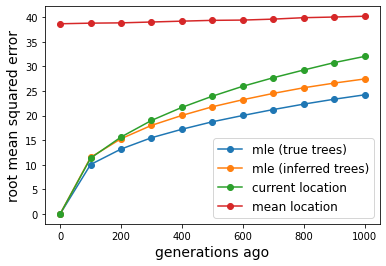

In [52]:
lineage_error(plotfilename='plots/rmse-single-lineages.pdf')

## ancestor clouds

In [19]:
SIGMAmate = 0.5
SIGMAdisp = 0.75

sigma2 = SIGMAdisp**2 + SIGMAmate**2/2
sigma = np.array([[sigma2,0],[0,sigma2]])

retain_gens = range(0,1001,100)

prefix = 'data/sim_100000000L_1e-08RBP_2.0LAMBDA_1.0K_100W_1.0SIGMAcomp_%sSIGMAmate_%sSIGMAdisp_0selfing_40000MAXT_0nrep_10000Ne_1e-08U_100d_50k_2G_100treeskip' %(SIGMAmate, SIGMAdisp)
filename = prefix + '_anc-locs.npy'
real_anc_locs = np.load(filename)
filename = prefix + '_NonetCutoff_ancestor-locations.npy'
true_anc_locs = np.load(filename)
filename = prefix + '_NonetCutoff_ancestor-variances.npy'
true_anc_vars = np.load(filename)

/tmp/ipykernel_194932/1352138940.py:14: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=true_anc_locs[:,sample,i,0], y=true_anc_locs[:,sample,i,1], ax=ax, zorder=0, color=sample_color) #inferred
/tmp/ipykernel_194932/1352138940.py:16: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=real_anc_locs[:,sample,i,0], y=real_anc_locs[:,sample,i,1], ax=ax, zorder=0, alpha=0.1, color='k') #real


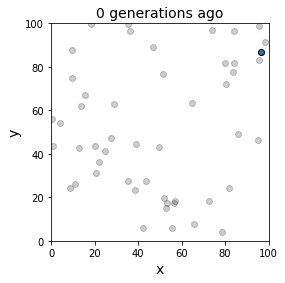

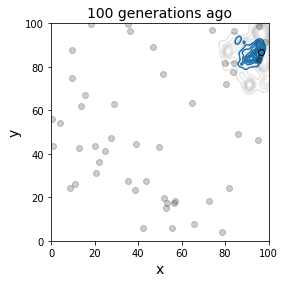

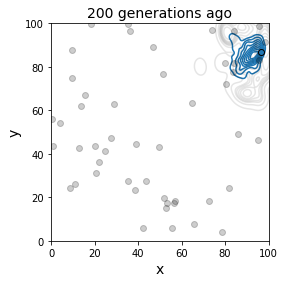

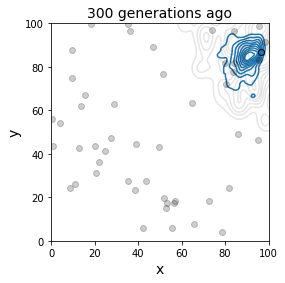

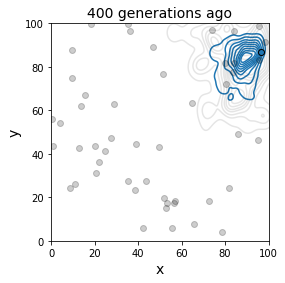

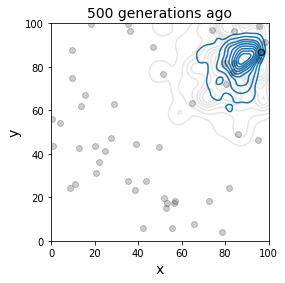

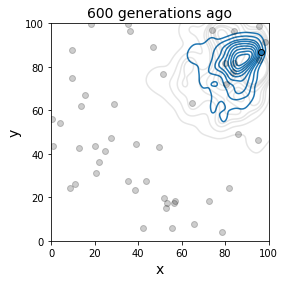

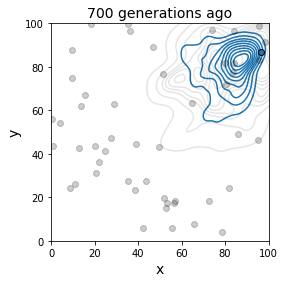

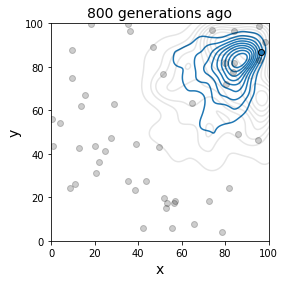

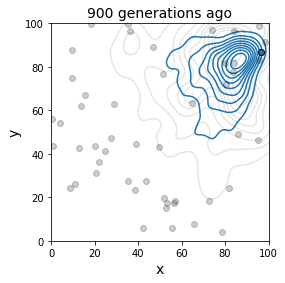

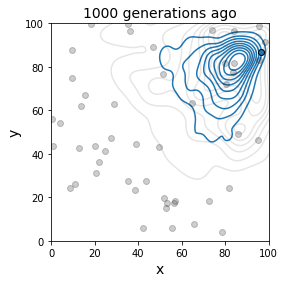

In [20]:
# sample=4
# sample_color = ccolors(2)
sample=0
sample_color = ccolors(0)

for i,t in enumerate(retain_gens):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    
    ax.scatter(real_anc_locs[0,:,0,0], real_anc_locs[0,:,0,1], color='k', alpha=0.1) #all samples
    ax.scatter(real_anc_locs[0,sample,0,0], real_anc_locs[0,sample,0,1], color=sample_color, zorder=1, edgecolors='k') #focal samples

    sns.kdeplot(x=true_anc_locs[:,sample,i,0], y=true_anc_locs[:,sample,i,1], ax=ax, zorder=0, color=sample_color) #inferred
#     ax.scatter(real_anc_locs[:,sample,i,0], real_anc_locs[:,sample,i,1], color=ccolors(1))
    sns.kdeplot(x=real_anc_locs[:,sample,i,0], y=real_anc_locs[:,sample,i,1], ax=ax, zorder=0, alpha=0.1, color='k') #real
    
    plt.xlim(0,100)
    plt.ylim(0,100)
    plt.title('%d generations ago' %t, fontsize=14)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('y', fontsize=14)
    # plt.legend()
    
#     plt.savefig('plots/ancestor-clouds-%dt.pdf' %t)
    
    plt.show()

In [17]:
def cloud_error(SIGMAmate=0.5, SIGMAdisp=0.75, nreps=range(10), k=50, plotfilename=None, nsamples=10, nloci=None, ending='_NonetCutoff_ancestor-locations_%dsample.npy'):

    prefix = 'data/sim_100000000L_1e-08RBP_2.0LAMBDA_1.0K_100W_1.0SIGMAcomp_%sSIGMAmate_%sSIGMAdisp_0selfing_40000MAXT' %(SIGMAmate,SIGMAdisp)

    sse_mle = np.zeros(11)
    sse_sample = np.zeros(11)
    sse_mean_sample = np.zeros(11)
    sse_mle_inf = np.zeros(11)
    n = 0
    n_inf=0
    for rep in nreps:

        prefix_rep = prefix + '_%dnrep_10000Ne_1e-08U_100d_%dk_2G' %(rep,k)

        filename = prefix_rep + '_100treeskip_anc-locs.npy'
        real_anc_locs = np.load(filename)[:nloci,:nsamples]

        filename = prefix_rep + '_100treeskip_NonetCutoff_ancestor-locations.npy'
        true_anc_locs = np.load(filename)[:nloci,:nsamples]
        
        sse_mle += np.sum(np.sum((np.mean(real_anc_locs, axis=0) - np.mean(true_anc_locs, axis=0))**2, axis=-1), axis=0)

        sample_locs = np.repeat(real_anc_locs[:,:,0,:], 11, axis=-2).reshape(real_anc_locs.shape) #locations of samples
        sse_sample += np.sum(np.sum((np.mean(real_anc_locs,axis=0) - np.mean(sample_locs,axis=0))**2, axis=-1), axis=0)

        mean_loc = np.repeat(np.mean(real_anc_locs[:,:,0,:],axis=1), 11*nsamples, axis=-2).reshape(real_anc_locs.shape) #mean sample location
        sse_mean_sample += np.sum(np.sum((np.mean(real_anc_locs,axis=0) - np.mean(mean_loc,axis=0))**2, axis=-1), axis=0)

        n += len(real_anc_locs[0])

        # real ancestor locations at loci used for inferred trees
        filename = prefix_rep + '_100treeskip_anc-locs-inf.npy'
        real_anc_locs_inf = np.load(filename)[:nloci,:nsamples]    

        # mle ancestor locations from inferred trees
        if '.npy' in ending:
            for sample in range(nsamples):
                try:
                    filename = prefix_rep + '_5numiter_0.5threshold_100treeskip_1000M' + ending %sample
                    inf_anc_locs = np.squeeze(np.load(filename))
                    sse_mle_inf += np.sum((np.mean(real_anc_locs_inf[:,sample], axis=0) - np.mean(inf_anc_locs, axis=0))**2, axis=-1)
                    n_inf += 1
                except:
                    print('missing rep %d sample %d' %(rep,sample))
    #                 print(filename)
                    pass
        else:
            inf_anc_locs = np.loadtxt(prefix_rep + '_5numiter_0.5threshold_100treeskip_1000M' + ending, delimiter=',')
            inf_anc_locs = inf_anc_locs.reshape([nloci,nsamples,10,4])[:,:,:,2:] #loci, samples, times, location
            inf_anc_locs = np.append(real_anc_locs[:nloci,:10,:1], inf_anc_locs, axis=2) #add observed sample location
            sse_mle_inf += np.sum(np.sum((np.mean(real_anc_locs_inf, axis=0) - np.mean(inf_anc_locs, axis=0))**2, axis=-1), axis=0)     
            n_inf = n

    rmse_mle = (sse_mle/n)**0.5
    rmse_sample = (sse_sample/n)**0.5
    rmse_mean_sample = (sse_mean_sample/n)**0.5
    rmse_mle_inf = (sse_mle_inf/n_inf)**0.5
    
    plt.plot(range(0,1001,100), rmse_mle, marker='o', label='mle (true trees)')
    plt.plot(range(0,1001,100), rmse_mle_inf, marker='o', label='mle (inferred trees)')
    plt.plot(range(0,1001,100), rmse_sample, marker='o', label='current location')
    plt.plot(range(0,1001,100), rmse_mean_sample, marker='o', label='mean location')

    plt.xlabel('generations ago', fontsize=14)
    plt.ylabel('root mean squared error', fontsize=14)
    plt.legend(fontsize=12)
    # ratio = 1.0
    # xleft, xright = plt.gca().get_xlim()
    # ybottom, ytop = plt.gca().get_ylim()
    # plt.gca().set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)

    if plotfilename is not None:
        plt.savefig(plotfilename)

    plt.show()
    
    return inf_anc_locs, real_anc_locs_inf

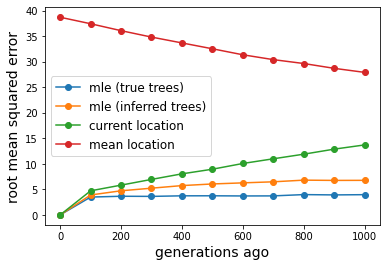

In [54]:
cloud_error(plotfilename='plots/rmse-ancestor-clouds.pdf')

## blups

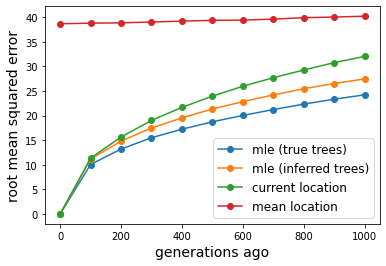

In [55]:
lineage_error(ending='_NonetCutoff_1000m_ancestor-locations_%dsample_blup.npy', plotfilename='plots/rmse-single-lineages-blup.pdf')

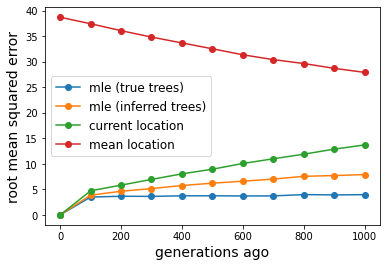

In [56]:
cloud_error(ending='_NonetCutoff_1000m_ancestor-locations_%dsample_blup.npy', plotfilename='plots/rmse-ancestor-clouds-blup.pdf')

## different numbers of importance samples

100


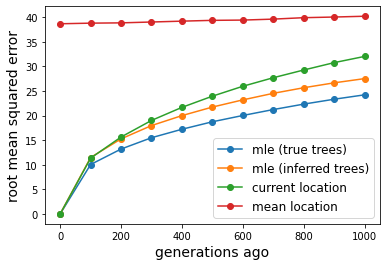

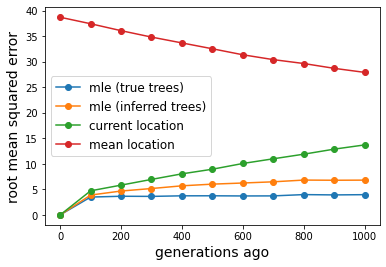

In [9]:
for m in [100]:
    print(m)
    ending='_NonetCutoff_%dm_ancestor-locations' %m
    ending = ending + '_%dsample.npy'
    plotfilename='plots/rmse-single-lineages-%dm.pdf' %m
    lineage_error(ending=ending, plotfilename=plotfilename)
    plotfilename='plots/rmse-clouds-%dm.pdf' %m
    m100=cloud_error(ending=ending, plotfilename=plotfilename)

10


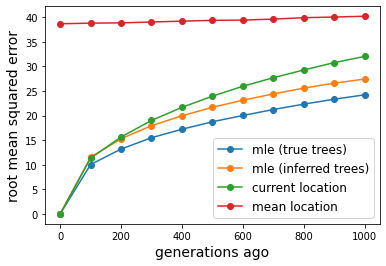

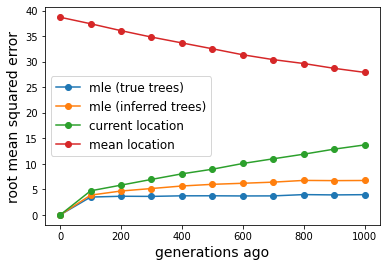

In [10]:
for m in [10]:
    print(m)
    ending='_NonetCutoff_%dm_ancestor-locations' %m
    ending = ending + '_%dsample.npy'
    plotfilename='plots/rmse-single-lineages-%dm.pdf' %m
    lineage_error(ending=ending, plotfilename=plotfilename)
    plotfilename='plots/rmse-clouds-%dm.pdf' %m
    m10 = cloud_error(ending=ending, plotfilename=plotfilename)

1


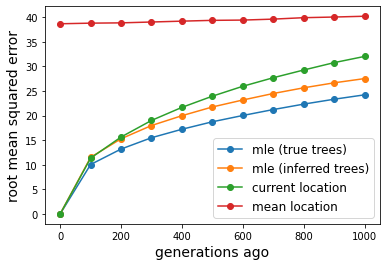

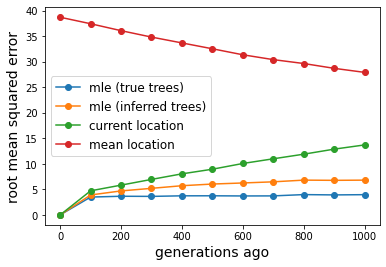

In [15]:
for m in [1]:
    print(m)
    ending='_NonetCutoff_%dm_ancestor-locations' %m
    ending = ending + '_%dsample.npy'
    plotfilename='plots/rmse-single-lineages-%dm.pdf' %m
    lineage_error(ending=ending, plotfilename=plotfilename)
    plotfilename='plots/rmse-clouds-%dm.pdf' %m
    m1 = cloud_error(ending=ending, plotfilename=plotfilename)

In [11]:
m100.shape

(260, 11, 2)

In [12]:
m10.shape

(260, 11, 2)

In [13]:
m100[0]

array([[11.36600986, 57.99829286],
       [13.21026082, 66.75684899],
       [11.7215242 , 68.0809554 ],
       [10.23247708, 69.40479968],
       [10.307351  , 70.48389741],
       [10.66983102, 70.40308274],
       [11.03240865, 70.32248929],
       [11.39526627, 70.24317564],
       [11.75731054, 70.16228126],
       [12.11964606, 70.08041091],
       [12.48208356, 69.99946992]])

In [14]:
m10[0]

array([[11.36600986, 57.99829286],
       [10.25638345, 68.4658956 ],
       [10.79890391, 70.23135165],
       [11.8066851 , 70.03043111],
       [12.81442198, 69.82945547],
       [13.82178538, 69.62681749],
       [14.8299976 , 69.4276487 ],
       [15.83784826, 69.22665287],
       [16.84551173, 69.02574708],
       [17.85332152, 68.82485763],
       [18.86079332, 68.62343006]])

In [16]:
m1[0]

array([[11.36600986, 57.99829286],
       [10.98477497, 68.91002814],
       [ 9.96071553, 71.37356031],
       [10.2066303 , 71.32757413],
       [10.45270032, 71.28111859],
       [10.69859909, 71.23508127],
       [10.94445806, 71.18990883],
       [11.19064306, 71.14312823],
       [11.4372431 , 71.09722469],
       [11.68229787, 71.05067573],
       [11.9295128 , 70.99802584]])

100


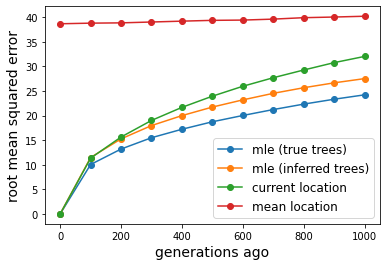

[0.         3.88330471 4.67386446 5.16332672 5.69298474 6.02235116
 6.24260048 6.47683708 6.81760186 6.78336577 6.80745577]


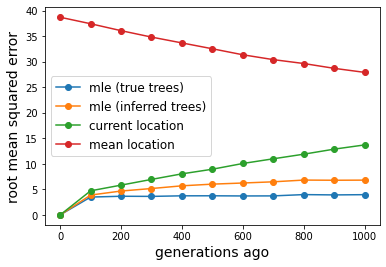

10


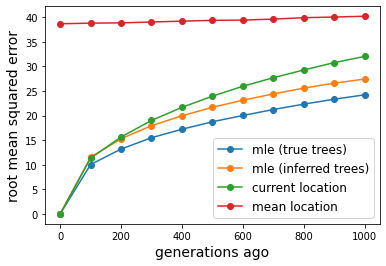

[0.         3.87050625 4.6785713  5.16328739 5.65772972 5.98554374
 6.1929005  6.41376409 6.75106961 6.7109763  6.73647653]


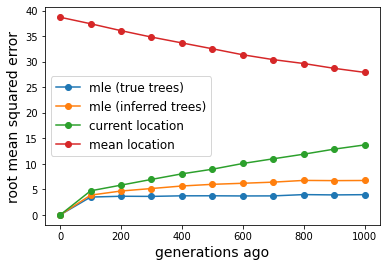

1


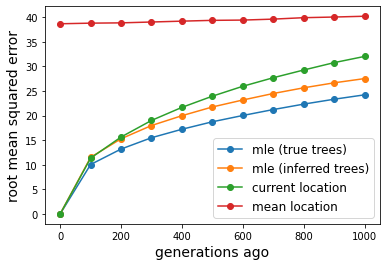

[0.         3.90271026 4.69618534 5.19959456 5.71273956 6.03983056
 6.25034588 6.47413019 6.80809061 6.76690867 6.80517702]


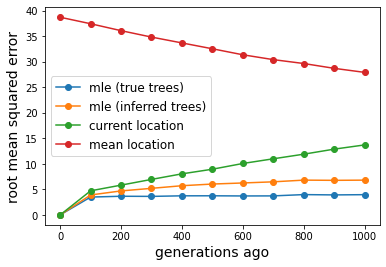

In [7]:
for m in [100,10,1]:
    print(m)
    ending='_NonetCutoff_%dm_ancestor-locations' %m
    ending = ending + '_%dsample.npy'
    plotfilename='plots/rmse-single-lineages-%dm.pdf' %m
    lineage_error(ending=ending, plotfilename=plotfilename)
    plotfilename='plots/rmse-clouds-%dm.pdf' %m
    cloud_error(ending=ending, plotfilename=plotfilename)

## different numbers of samples

25


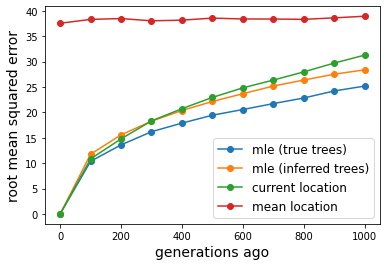

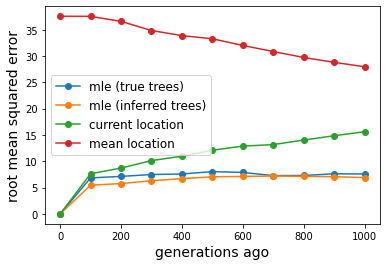

50


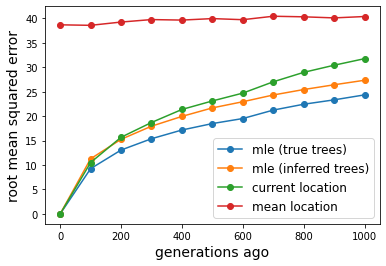

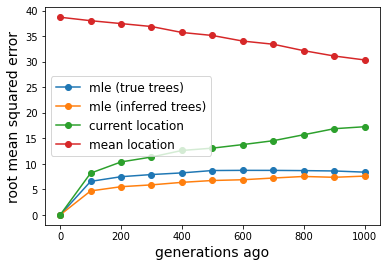

100


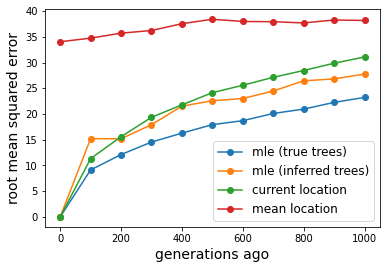

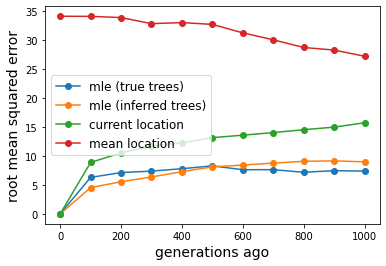

In [63]:
for k in [25,50,100]:
    print(k)
    ending='_100m_100n_NoneT_Alls_Allt.locs'
    plotfilename='plots/rmse-single-lineages-%dk.pdf' %k
    lineage_error(k=k, nloci=100, ending=ending, plotfilename=plotfilename)
    plotfilename='plots/rmse-ancestor-clouds-%dk.pdf' %k
    cloud_error(k=k, nloci=100, ending=ending, plotfilename=plotfilename)